In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

In [2]:
# HIDDEN
x = np.arange(0, 1.01, 0.01)
def f(x):
    return 6*x*(1-x)

def simulate_f(n):
    sim_x = stats.beta.rvs(2, 2, size=n)
    Table().with_column('x', sim_x).hist(bins=np.arange(0, 1.01, 0.05))
    plt.plot(x, f(x), color='darkblue', lw=2)
    plt.title('$f$ and Empirical Distribution of '+str(n)+' Simulated Values');

## The Meaning of Density ##

When we work with a discrete random variable $X$, a natural component of our calculations is the chance that $X$ has a particular value $k$. That's the probability we denote by $P(X = k)$.

What is the analog of $P(X = k)$ when $X$ has a density? If your answer is $P(X = x)$ for any number $x$, prepare to be disconcerted by the next paragraph.

### If $X$ Has a Density, Each Individual Value Has Probability 0 ###
If $X$ has a density, then probabilities are defined as areas under the density curve. The area of a line is zero. So if $X$ has a density, then for every $x$,

$$
P(X = x) ~ = ~ 0 
$$

"But $X$ has to be *some* value!" is a natural reaction to this. Take a moment now to reflect on the wonders of adding uncountably many zeros. On the real line, each point has length zero but intervals have positive length. On the plane, each line has area zero but rectangles have positive area. Calculus is powerful.

The fact that the chance of any single value is 0 actually reduces some bookkeeping. When we are calculating probabilities involving random variables that have densities, we don't have to worry about whether we should or should not include endpoints of intervals. The chance of each endpoint is 0, so for example,

$$
F(x) ~ = ~ P(X \le x) ~ = ~ P(X < x) ~~~ \text{for all } x
$$

Being able to drop the equal sign like this is a major departure from calculations involving discrete random variables; $P(X = k)$ has disappeared. But it does have an analog if we think in terms of infinitesimals.

In [3]:
# VIDEO: Meaning of Density
from IPython.display import YouTubeVideo

YouTubeVideo('7A7MqighkTA')

### An Infinitesimal Calculation ###
In the theory of Riemann integration, the area under a curve is calculated by discrete approximation. The interval on the horizontal axis is divided into tiny little segments. Each segment becomes the base of a very narrow rectangle with a height determined by the curve. The total area of all these rectangular slivers is an approximation to the integral. As you make the slivers narrower, the sum approaches the area under the curve.

Let's examine this in the case of the density we used as our example in the previous section:

$$
f(x) ~ = ~ 6x(1-x), ~~~ 0 < x < 1
$$

Here is one of those narrow slivers.

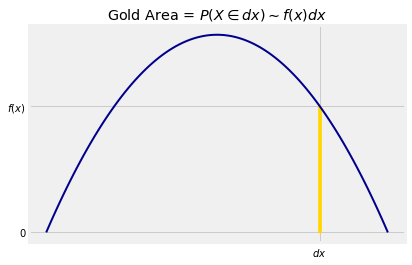

In [4]:
# NO CODE

plt.plot(x, f(x), color='darkblue', lw=2)
f_08 = f(0.8)
w = np.arange(0.8-0.005, 0.805, 0.01)
plt.fill_between(w, f(w), color='gold')
plt.xticks([0.8], ['$dx$'])
plt.yticks([0, f_08], ['0', '$f(x)$'])
plt.title('Gold Area = $P(X \in dx) \sim f(x)dx$');

We will now set up some notation that will be used repeatedly in the course.

- $x$ is a point on the horizontal axis
- $dx$ stands for two things (this considerably simplifies writing):
    - a tiny interval around $x$
    - the length of the tiny interval

Now $\{X \in dx \}$ is notation for "$X$ is in a tiny interval of length $dx$ around the point $x$". Don't worry about exactly what "around" means. It won't matter as we'll be taking limits as $dx$ goes to 0.

In this notation, the area of the gold sliver is essentially that of a rectangle with height $f(x)$ and width $dx$. We write

$$
P(X \in dx) ~ \sim ~ f(x)dx
$$

where as usual $\sim$ means that the ratio of the two sides goes to 1 as $dx$ goes to 0.

We have seen that $f(x)$ is not a probability. But for a tiny $dx$, the product $f(x)dx$ is essentially the probability that "$X$ is just around $x$".

This gives us an important analogy. When $X$ is discrete, then

$$
P(a \le X \le b) ~ = ~ \sum_{k=a}^b P(X = k)
$$

When $X$ has density $f$, then

$$
P(a \le X \le b) ~ = ~ \int_a^b f(x)dx
$$

The calculus notation is clever as well as powerful. It involves two analogies:

- $f(x)dx$ is the chance the chance that $X$ is just around $x$
- the integral is a continuous version of the sum

```{admonition} Quick Check
A random variable $X$ has density $f$ that is positive on the entire real number line. True or false: 

(a) For all $x$, $P(X=x) = f(x)$.

(b) For all $x$, $0 \le f(x) \le 1$.

(c) For all $x$, $P(X = x) = 0$.

(d) For all $x$, $P(X \in dx) \sim f(x)dx$.

```

```{admonition} Answer
:class: dropdown
False, False, True, True

```

```{admonition} Quick Check
A random variable $X$ has density $f$. Arrange the following from largest to smallest. If two entries are the same, put an $=$ sign between them; it doesn't matter in which order you write them.

$P(a \le X < b)$, $P(a < X < b)$, $P(a \le X \le b)$

```

```{admonition} Answer
:class: dropdown
All three are equal

```

### Probability Density ###
We can rewrite $P(X \in dx) \sim f(x)dx$ as

$$
f(x) ~ \sim ~ \frac{P(X \in dx)}{dx}
$$

**The function $f$ represents probability per unit length**. That is why $f$ is called a *probability density function*.

Let's take another look at the graph of $f$.

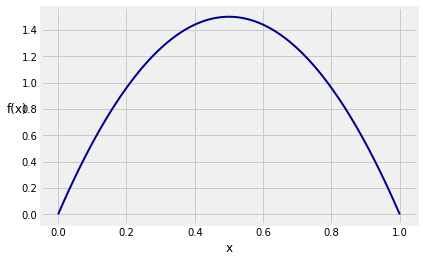

In [5]:
# NO CODE

plt.plot(x, f(x), color='darkblue', lw=2)
plt.xlabel('x')
plt.ylabel('f(x)', rotation=0);

If you simulate multiple independent copies of a random variable that has this density (exactly how to do that will be the subject of the next lab), then for example the simulated values will be more crowded around 0.5 than around 0.2.

The function `simulate_f` takes the number of copies as its argument and displays a histogram of the simulated values overlaid with the graph of $f$.

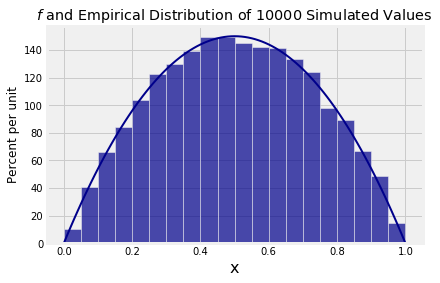

In [6]:
simulate_f(10000)

The distribution of 10,000 simulated values follows $f$ pretty closely. 

Compare the vertical scale of the histogram above with the vertical scale of the graph of $f$ that we drew earlier. You can see that they are the same apart from a conversion of proportions to percents.

Now you have a better understanding of why all histograms in Data 8 are drawn *to the density scale*, with heights calculated as

$$
\text{height of bar} ~ = ~ \frac{\text{percent in bin}}{\text{width of bin}}
$$

so that the units of height are "percent per unit on the horizontal axis".

Not only does this way of drawing histograms allow you to account for bins of different widths, as discussed in Data 8, it also leads directly to probability densities of random variables. You can think of the density curve as what the empirical histogram of the simulated values would look like if you had infinitely many simulations and infinitely narrow bins.